<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/Nourman_Hajar_Proyek_Akhir_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deskripsi Tujuan Bisnis

Saya telah memiliki dataset yang menunjukkan keadaan dan gejala medis yang dialami pasien dan juga diagnosis diabetes dari masing-masing pasien. Tujuan dari notebook ini adalah untuk mengeksplorasi data gejala diabetes dan juga memprediksi diagnosis diabetes berdasarkan gejala yang muncul.

# Analisa Pendekatan yang Akan Dilakukan

Dengan tujuan memprediksi diagnosis, maka pendekatan yang akan dilakukan adalah berupa predictive analysis. Namun sebelumnya, saya akan melakukan eksplorasi data menggunakan pendekatan descriptive analysis.

Predictive analysis akan dibuat menggunakan beberapa algoritma. Kemudian akan saya bandingkan akurasinya dengan satu sama lain. Yang dipakai yaitu "Naive Bayes", "Logistic Regression", "Decision Tree", "Random Forest", "SVM", "K-Nearest Neighbor", "XGBoost", dan "Majority Voting"


# Pengumpulan Data

Data yang digunakan ada di file "diabetes_data_upload.csv"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
sns.set_palette("bwr")
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline

df = pd.read_csv("/content/diabetes_data_upload.csv")

### Melihat dataset sekilas

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Pemahaman Terhadap Data yang Telah Dikumpulkan

Di dataset ini, terdapat total 17 kolom. Dengan 2 kolom yang sesuai dengan karakteristik pasien, yaitu age, gender. Kemudian ada 14 kolom yang mendeskripsikan apa saja gejala yang dirasakan pasien. Dan ada satu kolom yang berisi diagnosis pasien apakah terkena diabetes atau tidak (positif/negatif)

In [ ]:
df.shape

(520, 17)

In [ ]:
df.describe(include="all")

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Persiapan Data

### Checking null values

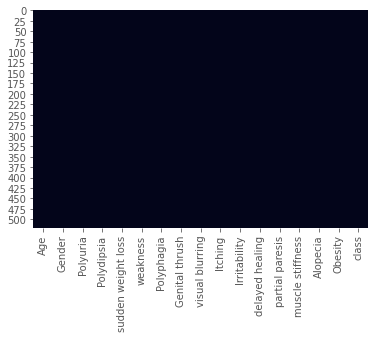

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

### Standarisasi nama kolom dan mapping nilai boolean

In [ ]:
# Make column name lowercase and convert space to underscore
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")

In [ ]:
# Map yes/no values
one_values = ["Male", "Positive", "Yes"]
zero_values = ["Female", "Negative", "No"]

for column in df.columns:
    df[column] = df[column].replace(to_replace=[one_values], value=1)
    df[column] = df[column].replace(to_replace=[zero_values], value=0)

Kolom "class" juga akan diubah namanya menjadi "status"

In [ ]:
df = df.rename({"class": "status"}, axis = "columns")
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,status
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Eksplorasi Data

### Status dan gender distribution

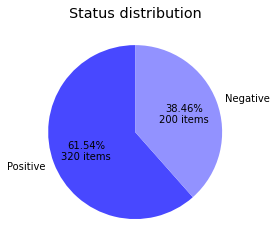

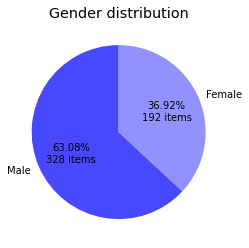

In [ ]:
# Defining a function to plot a simple pie chart
def plotPie(value, title, label):
    plt.figure(figsize=(4,4))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items')
    )
    plt.title(title)
    plt.show()

plotPie(df["status"], "Status distribution", ["Positive", "Negative"])
plotPie(df["gender"], "Gender distribution", ["Male", "Female"])

### Age distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


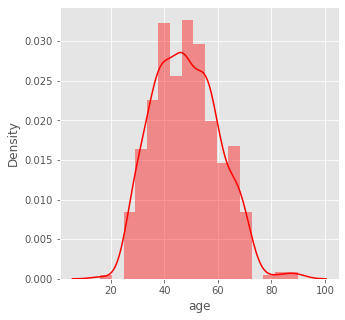

In [ ]:
plt.figure(figsize=(5,5))

ax = sns.distplot(df["age"], color="r")

### Status dan hubungannya dengan gender

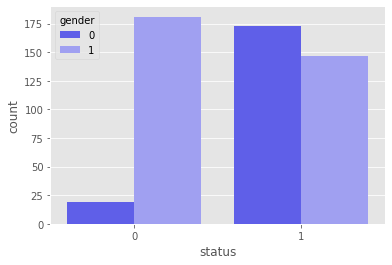

In [ ]:
ax = sns.countplot(x="status", data=df, hue="gender")

### Status dan hubungannya dengan age

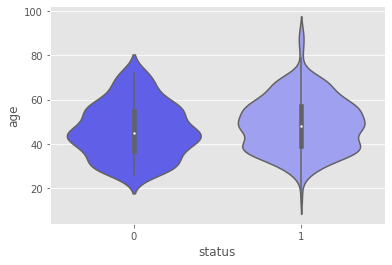

In [ ]:
ax = sns.violinplot(x="status", y="age", data=df)

In [ ]:
# Divide data into positive and negative class data
df_pos = df[df["status"] == 1]
df_neg = df[df["status"] == 0]

In [ ]:
print("Average positive age:", df_pos["age"].mean())
print("Average negative age:", df_neg["age"].mean())

Average positive age: 49.071875
Average negative age: 46.36


### Hubungan gejala yang dialami pasien dan diagnosis diabetes

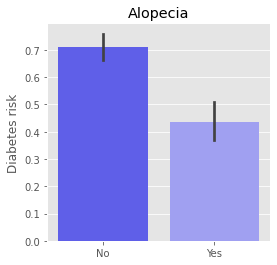

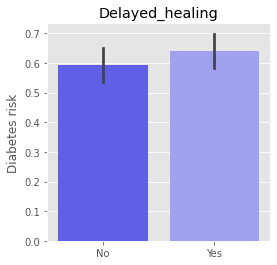

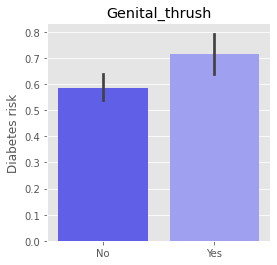

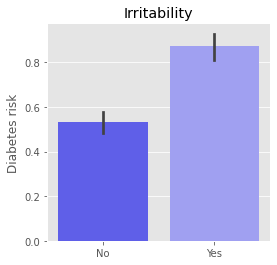

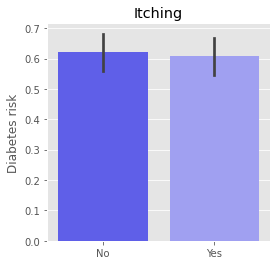

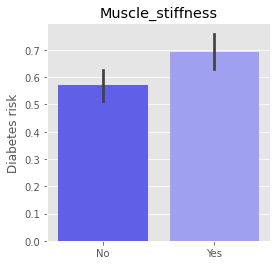

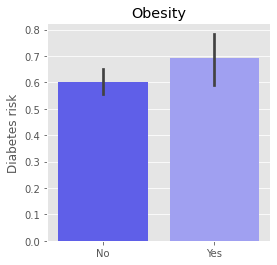

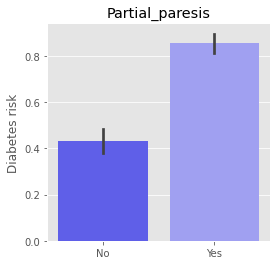

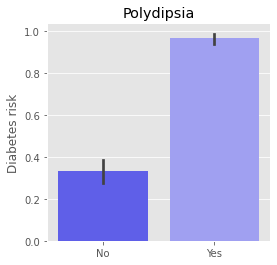

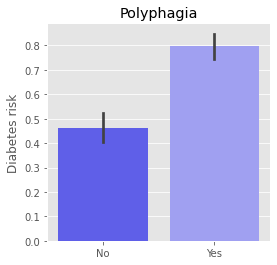

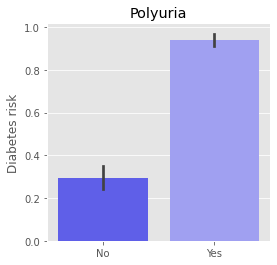

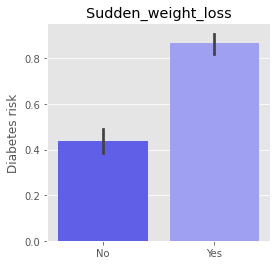

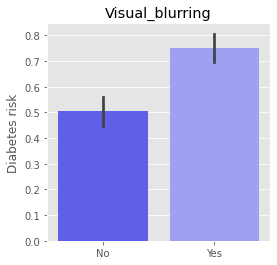

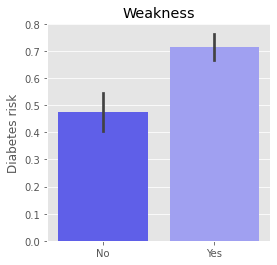

In [ ]:
df_symptoms = df[df.columns.difference(["age", "status", "gender"])]

for column in df_symptoms.columns:
    plt.figure(figsize=(4,4))
    ax = sns.barplot(x=column, y="status", data=df)
    ax.set_xticklabels(["No", "Yes"])
    ax.set_ylabel("Diabetes risk")
    ax.set_xlabel(None)
    title = column.capitalize()
    plt.title(title)
    plt.show()

### Gejala yang dialami di semua pasien

<Figure size 360x360 with 0 Axes>

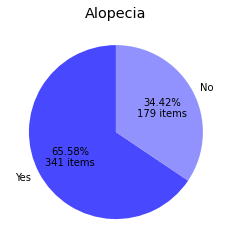

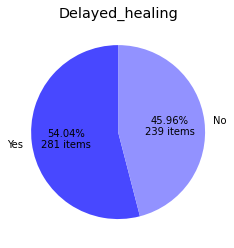

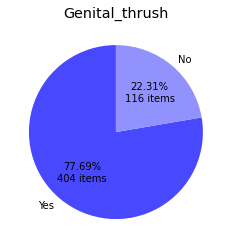

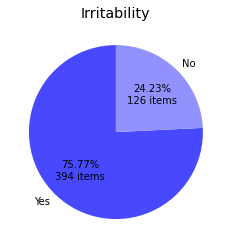

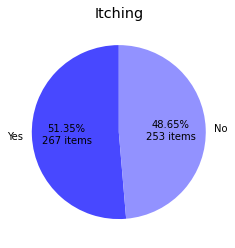

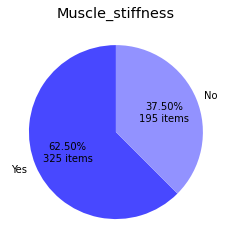

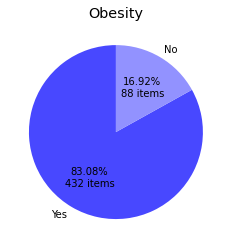

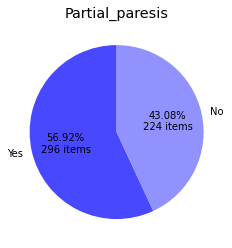

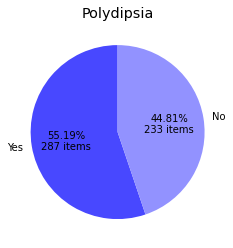

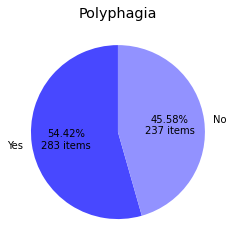

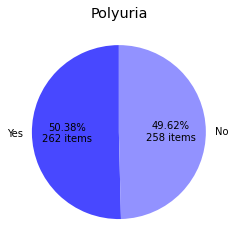

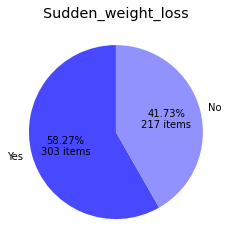

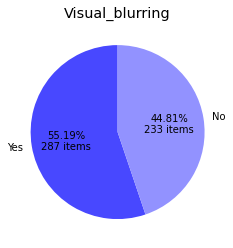

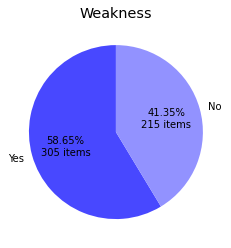

In [ ]:
# Select only the symptom columns
df_symptoms = df[df.columns.difference(["age", "status", "gender"])]
plt.figure(figsize=(5,5))
for column in df_symptoms.columns:
    plotPie(df_symptoms[column], column.capitalize(), ["Yes", "No"])

### Correlation heatmap

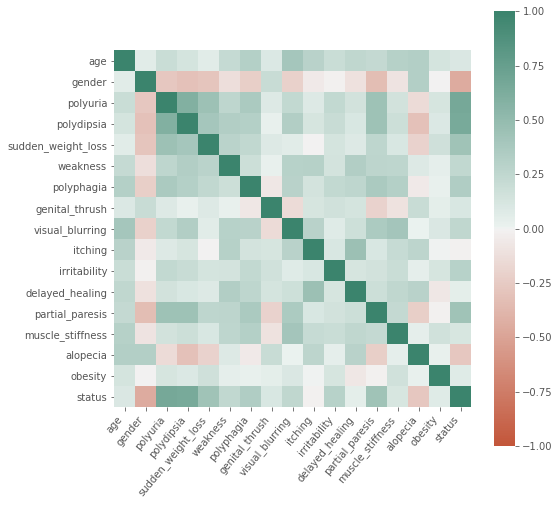

In [ ]:
plt.figure(figsize=(8,8))

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 160, n=256),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment="right"
);

Kita bisa melihat dengan sekilas bahwa variabel polyuria and polydipsia berkorelasi positif dengan status, dan gender memiliki korelasi negatif dengan status.

# Pemodelan Data

### Features selection: Chi-Squared test

Kita akan memilih variabel dengan Chi-squared value yang tertinggi

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

x = df[df.columns.difference(["status"])]
y = df["status"]

feat_chi = SelectKBest(score_func=chi2, k=10)
fit = feat_chi.fit(x, y)
feat_chi = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(fit.scores_)], axis=1)
feat_chi.columns = ["column", "score"]
feat_chi = feat_chi.sort_values(by="score", ascending=False).reset_index(drop=False)
feat_chi = feat_chi[0:10]["column"].to_numpy()
print(feat_chi)

['polydipsia' 'polyuria' 'sudden_weight_loss' 'partial_paresis' 'gender'
 'irritability' 'polyphagia' 'alopecia' 'age' 'visual_blurring']


In [ ]:
from sklearn.model_selection import train_test_split

x = df[feat_chi]
y = df["status"]

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

### Validasi baseline

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

nb = GaussianNB()
lr = LogisticRegression(max_iter = 2000)
dt = tree.DecisionTreeClassifier(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
svc = SVC(probability = True)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state =1)
vot = VotingClassifier(
    estimators = [('nb',nb), ('lr',lr), ('dt',dt), ('rf',rf), ('svc',svc), ('knn',knn), ('xgb',xgb)],
    voting = 'soft'
)

models = [nb, lr, dt, rf, svc, knn, xgb, vot]
models_name = [
    "Naive Bayes",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "SVM",
    "K-Nearest Neighbor",
    "XGBoost",
    "Voting"
]

In [ ]:
results_base = {}

for index, model in enumerate(models):
    cv = cross_val_score(model, x_train, y_train, cv=10)
    results_base[models_name[index]] = cv.mean() * 100.0
    print("Baseline using", models_name[index], "=", cv.mean() * 100.0, "%", "with std:", cv.std())

Baseline using Naive Bayes = 89.3960511033682 % with std: 0.051376631867067
Baseline using Logistic Regression = 91.31823461091754 % with std: 0.0557462554911829
Baseline using Decision Tree = 95.65040650406506 % with std: 0.044447247628849954
Baseline using Random Forest = 96.85249709639955 % with std: 0.034548502054761676
Baseline using SVM = 93.49012775842043 % with std: 0.036271025759977635
Baseline using K-Nearest Neighbor = 90.8478513356562 % with std: 0.050885264702889385
Baseline using XGBoost = 95.17421602787456 % with std: 0.034619344748048515
Baseline using Voting = 95.89430894308944 % with std: 0.04091917948852959


### Memprediksi data

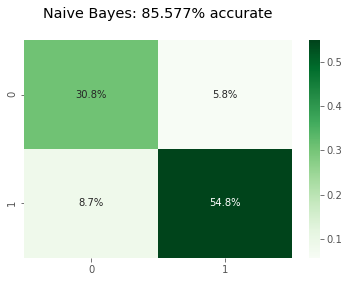

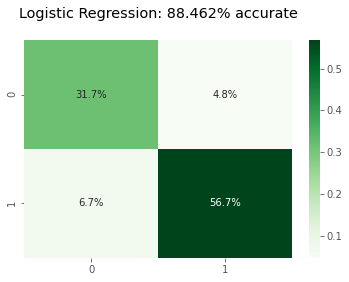

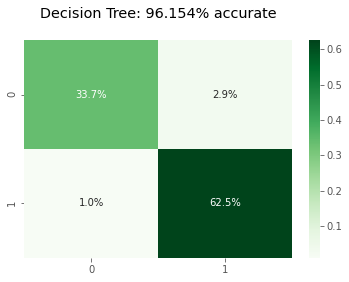

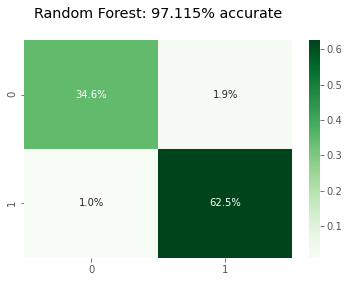

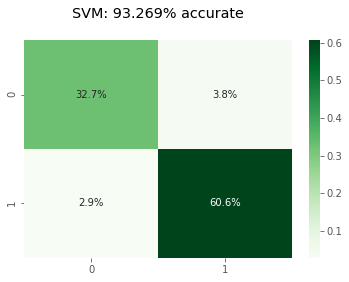

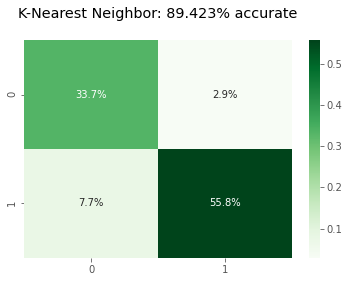

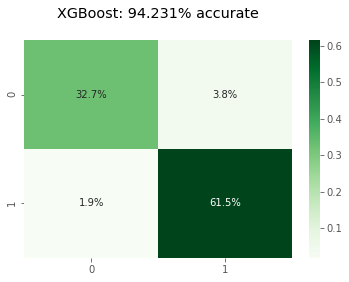

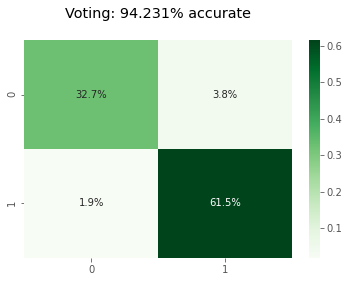

In [ ]:
results = {}

for index, model in enumerate(models):
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    confuse = confusion_matrix(y_test, predict)
    accur = accuracy_score(y_test, predict)
    results[models_name[index]] = accur * 100.0
    
    title = models_name[index] + ": " + "{:.3f}%".format(accur*100) + " accurate\n"
    ax = sns.heatmap(confuse/np.sum(confuse), annot=True, fmt='.1%', cmap="Greens")
    ax.set_title(title)
    plt.show()

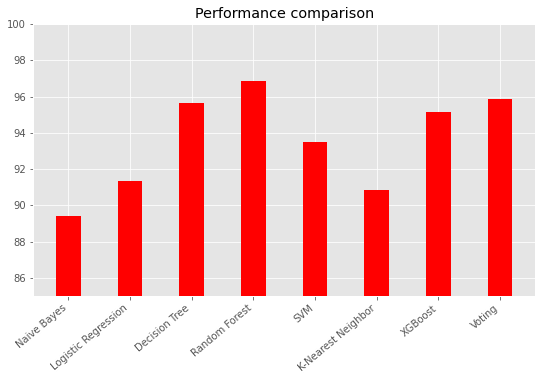

In [ ]:
x = np.arange(len(results))

plt.figure(figsize=(9,5))
ax = plt.subplot(111)
ax.bar(x, results_base.values(), width=0.4, color="red", align="center")
plt.ylim((85, 100))
plt.xticks(x, results_base.keys())
plt.title("Performance comparison")
plt.xticks(rotation=40, horizontalalignment="right")
plt.show()

# Evaluasi & Komparasi Kinerja Model

Pada pemodelan di atas, bisa dikatakan bahwa model yang kita buat sudah memenuhi kebutuhan bisnis kita yaitu memprediksi diagnosis diabetes.

Akurasi yang paling tinggi dicapai oleh algoritme Random Forest, dengan akurasi sebesar 97.115% dan feature selection chi-squared.